## Simulation und Modellierung WS 16/17 Uebung 07 : 
### Abgabe zum 11.12.2016

### <u>Aufgabe 1</u> Erste Schritte mit Git (3P)

Ziel dieser Aufgabe ist, die Lösung dieses kompletten Aufgabenblattes bei einem Git-Filehost (github) online zu stellen. An der hochgeladenen Version sollen Sie dann noch mindestens eine Änderung vornehmen.

Nun der Reihenfolge nach: 
* Erstellen Sie einen Account bei Github mit einem `username`

  https://github.com/
 
  Erstellen Sie dort per Mausklick ein neues Repository, z.B. `my_repo`. (unter `new repository`)

* Installieren Sie git auf Ihrem Arbeitsrechner:

  #### Linux:
  
  `yum install git`
  
  `apt-get install git`
  
  `zypper in git`

  #### Mac:
  
  `brew install git`
  
  https://git-scm.com/download/mac
  
  #### Windows:
  
  http://git-for-windows.github.io//

  Setzen Sie dann eventuell Namen und Adresse.
  
  `git config --global user.name "Your Name"`
  
  `git config --global user.email you@example.com`


* Initialisieren Sie git in einem neuen Ordner. Fügen Sie `my_repo.git` als origin hinzu. Speichern Sie dieses notebook im neuen Ordner. Führen Sie `git add .`, `git commit -m "  "` und `git push origin master` aus. Das alles geht im Terminal folgendermaßen:

  ```bash
      mkdir neuer_ordner
      cd neuer_ordner
      git init
      git remote add origin https://username@bitbucket.org/username/my_repo.git
      cp /path/to/notebook/my_notebook.ipynb my_notebook.ipynb
      git add .
      git commit -m "Dieses notebook ist die Hausaufgabe Blatt 7, zunaechst unausgefuellt."
      git push origin master  
  ```
  
  Sehen Sie nach, ob Ihr notebook online ist.

* Spielen Sie mit `git status`, `git log`, `git branch -av` .. herum und klicken Sie im Webfilehost herum, bis Sie sich ein wenig auskennen. Schreiben Sie Fragen für die Übung auf.

* Nehmen Sie nun lokal auf Ihrem Rechner Änderungen am notebook vor, zum Beispiel indem Sie die Hausaufgaben lösen. Ändern Sie dies wie oben online: `git add .`, `git commit -m "  "`, `git push origin master`. Achten Sie auf sinnvolle commit-Kommentare.
  
  ```bash
      git add .
      git commit -m "Aufg. 1 geloest, es gibt noch ein Problem mit dem Vorzeichen von h."
      git push origin master  
  ```

Senden Sie den https-Repository-Pfad an frpeter (at) uni-potsdam.de.

### <u>Aufgabe 2</u> Das Lineare Least Squares Problem (7P)

Fuer die Koordinaten $(x,y)$ eines beliebiegen Kegelschnittes in der Ebene gilt

$$
        f(x,y) = A x^2 + B xy + C y^2 + D x + E y = 1
$$

Die Datei `orbit.dat` enthaelt eine Tabelle von $x$ und $y$ Werten, welche messfehlerbehaftete Punkte eines Kegelschnittes sind. 


- Laden Sie die Daten in ein `numpy` Array und finden Sie die Koeffizienten $A,B,C,D$ und $E$, welche die Summe der quadratischen Abweichungen ueber alle Messpunkte des Ausdrucks auf der linken Seite zur Zahl `1` minimiert.

Der Kegelschnitt ist eine geschlossene Kurve, wenn $B^2-4AC<0$ gilt, eine Parabel, wenn $B^2-4AC=0$ und ansonsten eine Hyperbel.

- Ist dieser Kegelschnitt eine offene oder geschlossene Kurve?
- Zeichnen Sie alle Kurven $y=y(x)$, die die Kegelschnittgleichung mit den von Ihnen gefundenen Koeffizienten erfuellen zusammen mit den Datenpunkten in ein Diagram.

*Hinweis* : Sie koennen die Kegelschnittgleichung als quadratische Gleichung explizit nach $y$ aufloesen und beide Loesungen dort plotten, wo der Imaginaerteil gleich Null (oder sehr klein) ist, oder den Wertebereich von $x$ explizit berechnen.

*Zur Erinnerung* : Die Summe der quadratischen Abweichungen eines ueberbestimmten linearen Gleichungssystems

$$
    \mathrm{A}(\vec{x},\vec{y}) \vec{c} = \vec{b}
$$
wird durch die Loesung des kleineren linearen Gleichungssystems

$$
    \mathrm{A}^\top\mathrm{A} \vec{c} = \mathrm{A}^\top\vec{b}
$$
minimiert.

In [2]:
import numpy as np

messwerte=np.loadtxt("./orbit.dat")
N=np.shape(messwerte)
N=N[0]                                      #Anzahl der Datentupel

Ma=np.ones((N,5))                           #Matrix Ma erstellen
for i in range(N):                          #Einträge von A ersetzen durch:
    Ma[i,0]=messwerte[i,0]**2               #xi^2
    Ma[i,1]=messwerte[i,0]*messwerte[i,1]   #xi*yi
    Ma[i,2]=messwerte[i,1]**2               #yi^2
    Ma[i,3]=messwerte[i,0]                  #xi
    Ma[i,4]=messwerte[i,1]                  #yi
    
V=np.ones((N,1))                            #Vektor V erstellen

c=np.linalg.solve(Ma.T.dot(Ma),Ma.T.dot(V))

In [3]:
A=c[0]
B=c[1]
C=c[2]
D=c[3]
E=c[4]
print(B**2-4*A*C)
print(c)

[-2.85292782]
[[ 0.9827333 ]
 [ 0.95673125]
 [ 0.95861779]
 [ 1.00987493]
 [ 1.02591762]]


Der Kegelschnitt ist eine geschlossene Kurve.

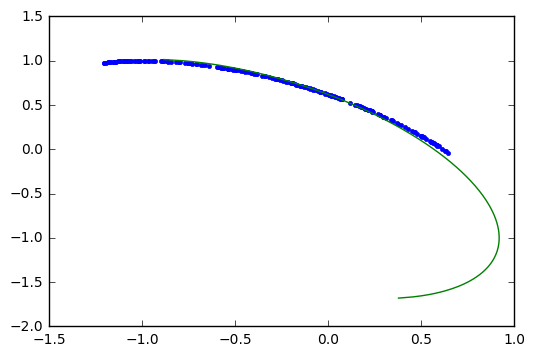

In [28]:
%matplotlib inline
from pylab import *

messwerte.shape=(2*N)
messwerte_x=messwerte[0:2*N:2]
messwerte_y=messwerte[1:2*N:2]

x=linspace(-2,2,301)
x=x[(B*x+E)**2-4*C*(A*x**2+D*x-1)>=0]

y1=(sqrt((B*x+E)**2-4*C*(A*x**2+D*x-1))-B*x-E)/2*C

plot(messwerte_x,messwerte_y,'.')
plot(y1,x)
show()

### <u>Zusatzaufgabe</u> (2P)

- Schreiben Sie eine Funktion `polyfit(x,y,N=0)`, welche fuer `L` Datenpunkte in den Containern `x` und `y` die Koeffizienten `c` eines Polynoms 
$$
    y = p(x)= c_0 x^0 + c_1 x^1 + c_2 x^2 + \dots + c_N x^N
$$ 
`N`ten Grades findet, welches die Summe der quadratischen Abweichungen $\sum_l (p(x_l)-y_l)^2$ minimiert. *Hinweis* : wandeln Sie `x` und `y` in `numpy` arrays um.
- Demonstrieren Sie die Funktion grafisch anhand von `L` $\gg$ `N` Punkten eines Polynoms, welche zufaellige Abweichungen in $x$ und $y$ Richtung aufweisen.
- Finden Sie ein Polynom, welches die Daten der ersten Aufgabe gut beschreibt.

In [32]:
def polyfit(x,y,N=0):
    x=np.array(x)
    y=np.array(y)
    L=len(x)
    
    P=np.ones((L,N+1))
    for i in range (L):
        for j in range(1,N+1):
            P[i,j]=x[i]**j
            
    Q=np.linalg.solve(P.T.dot(P),P.T.dot(y))
    return Q

In [35]:
polyfit(messwerte_x,messwerte_y,N=4)

array([ 0.61824282, -0.72145652, -0.36420239, -0.09350445, -0.06921684])